In [2]:
import sys
import os
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import trimesh
from functools import partial

In [6]:
plt.rc("figure", dpi=250)
plt.rc("legend", fontsize=6)

# Cloud Data

In [7]:
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

In [8]:
mesh = trimesh.load(os.path.join(DATA_DIR, "chair/train/chair_0001.off"))
mesh.show()

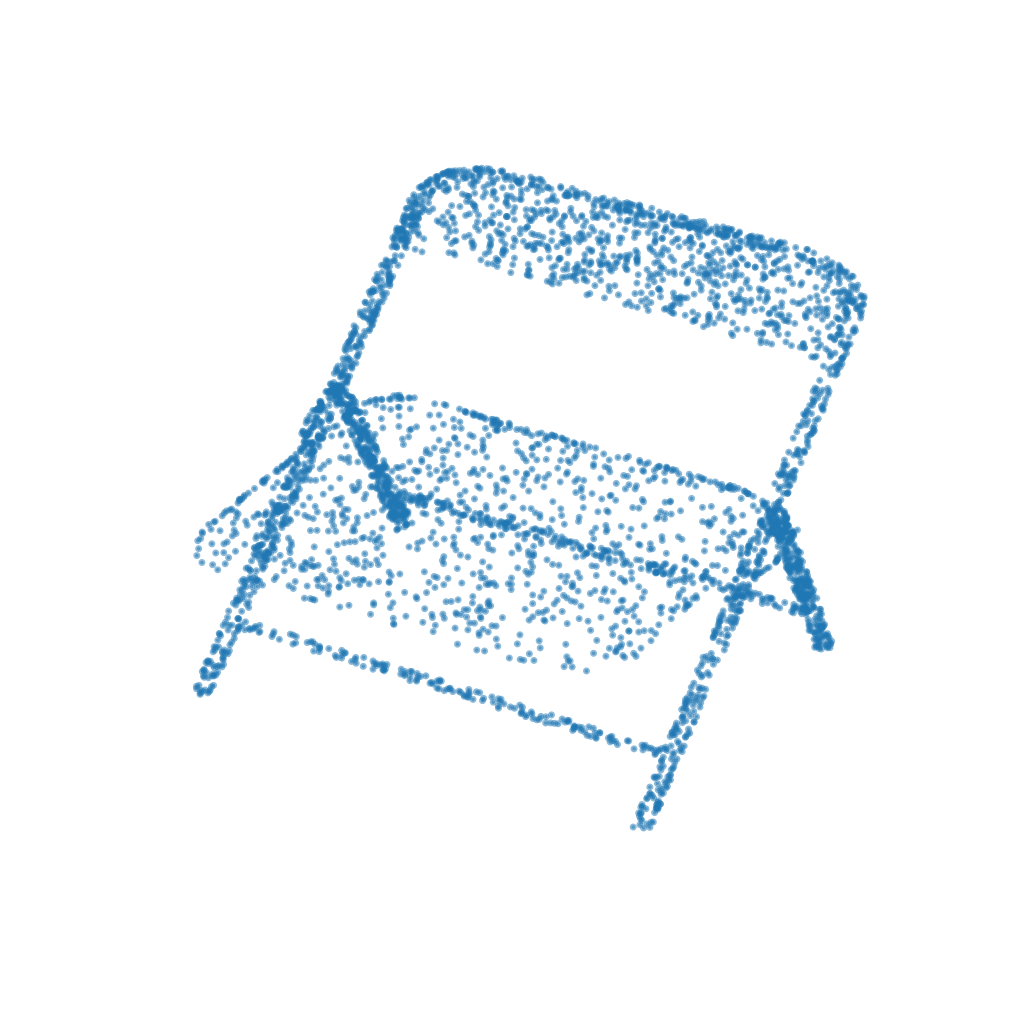

In [17]:
points = mesh.sample(4096)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5)
ax.set_axis_off()
plt.show()

In [18]:
def parse_dataset(num_points=4096):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [19]:
parsed = parse_dataset(num_points=4096)

processing class: table
processing class: dresser
processing class: chair
processing class: night_stand
processing class: desk
processing class: toilet
processing class: bed
processing class: bathtub
processing class: sofa
processing class: monitor


In [9]:
# import pickle
# pickle.dump((
#     parsed[0].astype(np.float32),
#     parsed[1].astype(np.float32),
#     parsed[2].astype(np.float32),
#     parsed[3].astype(np.float32)
# ),
# open('../data/modelnet10_4096', 'wb+'))